## Expression talks Emotions

This is a notebook that demonstrates how to use the [Diffusers package](https://huggingface.co/docs/diffusers/index) from Huggingface to run stable diffusion. [Huggingface](https://huggingface.co) is a community-driven  platform that provides a comprehensive suite of open-source libraries and tools for machine learning. Think of it as a kind of "github for machine learning". The diffusers package provides a simple API and a number of pretrained models that allow to easily run and experiment with diffusion models. 

### Installing

In [2]:
!pip install --upgrade diffusers\[torch\]
!pip install transformers
!pip install matplotlib

### Importing

In [24]:
import platform
import torch
import numpy as np
import matplotlib.pyplot as plt

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
device

'mps'

### Running Stable Diffusion Pipeline

In [4]:
# Import necessary modules from the diffusers package
from diffusers import StableDiffusionPipeline
from diffusers import DPMSolverMultistepScheduler

# The version of Stable Diffusion model to use
sd_version = '2.1'

# Determine the model key based on the specified version
if sd_version == '2.1':
    model_key = "stabilityai/stable-diffusion-2-1-base"
elif sd_version == '2.0':
    model_key = "stabilityai/stable-diffusion-2-base"
elif sd_version == '1.5':
    model_key = "runwayml/stable-diffusion-v1-5"

# Initialize the Stable Diffusion pipeline with the specified model key
# and additional configuration options
pipe = StableDiffusionPipeline.from_pretrained(
    model_key, 
    torch_dtype=torch.float16,  # Specify torch data type (float16)
    use_safetensors=True       # Use safetensors for safe tensor operations
)

# Configure the scheduler for the pipeline for faster inference
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# Transfer the pipeline to the appropriate device (CPU, CUDA, or MPS)
pipe = pipe.to(device)

# Enable attention slicing if the device is MPS
if device == 'mps':
    pipe.enable_attention_slicing()

# Enable sequential CPU offload if the device is CUDA
if device == 'cuda':
    pipe.enable_sequential_cpu_offload()


/Users/kriyagandhi/miniconda3/envs/dmlap2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  6.98it/s]


100%|██████████| 50/50 [02:00<00:00,  2.41s/it]


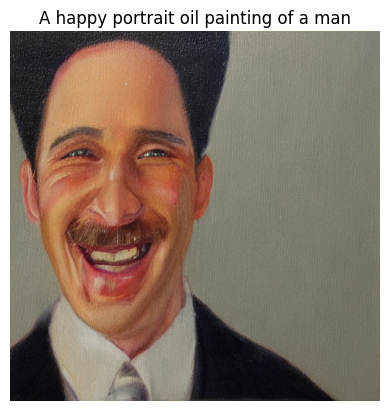

In [5]:
from diffusers import StableDiffusionPipeline

# Initialize the pipeline
pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

# Set the device
device = "cuda" if torch.cuda.is_available() else "cpu"
pipeline = pipeline.to(device)

# Set the prompt and generator seed
prompt = "A happy portrait oil painting of a man"
generator_seed = 123  # Adjust the seed as needed

# Generate the image
image = pipeline(
    prompt,
    generator=torch.Generator(device).manual_seed(generator_seed),
    guidance_scale=11.5,  # Adjust guidance scale
    num_inference_steps=50,  # Adjust number of inference steps
).images[0]

# Display the generated image
plt.imshow(np.array(image))
plt.title(prompt)
plt.axis('off')
plt.show()


## Text guided image to image generation 

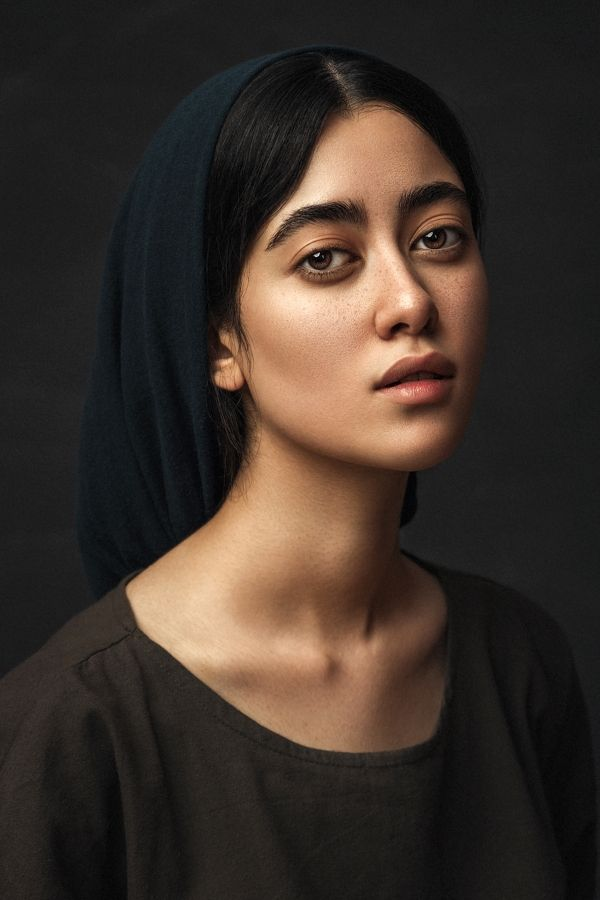

In [6]:
# Import the Image module from the PIL (Python Imaging Library) package
from PIL import Image 

# Open an image file named "02.jpg" located in the "images" directory
# and assign it to the variable seed_image
seed_image = Image.open("images/02.jpg")

# Display the seed image
seed_image

#### Pipeline Loading

In [7]:
# Import the StableDiffusionImg2ImgPipeline class from the diffusers package
from diffusers import StableDiffusionImg2ImgPipeline

# Initialize the Stable Diffusion Image-to-Image pipeline with a pretrained model key
# and additional configuration options (torch_dtype, use_safetensors)
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_key,                   # Pretrained model key
    torch_dtype=torch.float16,  # Specify torch data type (float16)
    use_safetensors=True       # Use safetensors for safe tensor operations
)

# Configure the scheduler for the pipeline for faster inference
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# Transfer the pipeline to the appropriate device (CPU, CUDA, or MPS)
pipe = pipe.to(device)

# Enable attention slicing if the device is MPS
if device == 'mps':
    pipe.enable_attention_slicing()

# Enable sequential CPU offload if the device is CUDA
if device == 'cuda':
    pipe.enable_sequential_cpu_offload()


Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  9.28it/s]
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fai

#### Image Generation

100%|██████████| 14/14 [00:13<00:00,  1.02it/s]


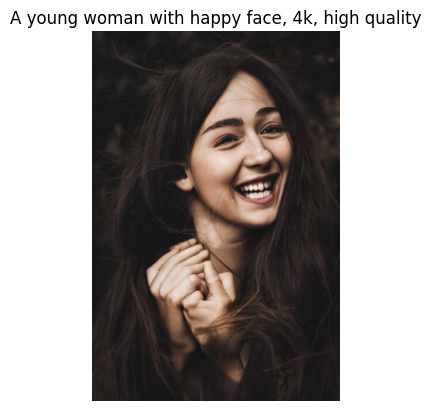

In [6]:
from diffusers import StableDiffusionImg2ImgPipeline
from PIL import Image

# Initialize the pipeline
pipeline = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")

# Set the device
device = "cuda" if torch.cuda.is_available() else "mps"
pipeline = pipeline.to(device)

# Set the prompt, seed image, and generator seed
prompt = "A young woman with happy face, 4k, high quality"
seed_image_path = "images/02.jpg"  # Path to the seed image
generator_seed = 123  # Adjust the seed as needed

# Load the seed image
seed_image = Image.open(seed_image_path)

# Generate the image
image = pipeline(
    prompt,
    image=seed_image,
    guidance_scale=11.5,  # Adjust guidance scale
    strength=0.7,  # Adjust strength
    generator=torch.Generator(device).manual_seed(generator_seed),
    num_inference_steps=20,  # Adjust number of inference steps
).images[0]

# Display the generated image
plt.imshow(np.array(image))
plt.title(prompt)
plt.axis('off')
plt.show()


In [8]:
import torch
from diffusers import StableDiffusionImg2ImgPipeline
from diffusers.utils import load_image

# Initialize the pipeline
pipeline = StableDiffusionImg2ImgPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, use_safetensors=True
)

# Set the device
device = "cuda" if torch.cuda.is_available() else "mps"
pipeline = pipeline.to(device)

# Set the prompt, seed image, and generator seed
prompt = "A young woman with different emotions face, 4k, high quality"
seed_image_path = "images/02.jpg"  # Path to the seed image
generator_seed = 123  # Adjust the seed as needed

# Load the seed image
seed_image = load_image(seed_image_path)

# Generate multiple images
num_images = 100  # Number of images to generate
for i in range(num_images):
    # Generate the image
    image = pipeline(
        prompt,
        image=seed_image,
        guidance_scale=11.5,  # Adjust guidance scale
        strength=0.7,  # Adjust strength
        generator=torch.Generator(device).manual_seed(generator_seed + i),  # Different seed for each image
        num_inference_steps=20,  # Adjust number of inference steps
    ).images[0]

    # Save or display the generated image
    image.save(f"generated images/generated_image_{i}.jpg")  # Save each image with a unique filename


100%|██████████| 14/14 [00:11<00:00,  1.24it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
100%|██████████| 14/14 [00:11<00:00,  1.25it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.
100%|██████████| 14/14 [00:11<00:00,  1.26it/s]


#### Converting Generated Images to Video

In [23]:
# Install ffmpeg using conda package manager from the conda-forge channel
conda install -c conda-forge ffmpeg

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [21]:
import os
import subprocess

# Directory containing the generated images
images_dir = "generated images/"

# Output video file path
output_video_path = "generated_video02.mp4"

# Use ffmpeg to create the video
subprocess.run(["ffmpeg", "-framerate", "5", "-i", os.path.join(images_dir, "generated_image_%d.jpg"), "-c:v", "libx264", "-pix_fmt", "yuv420p", output_video_path])

print("Video created successfully!")


ffmpeg version 6.1.1 Copyright (c) 2000-2023 the FFmpeg developers
  built with clang version 16.0.6
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1712656609600/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libharfbuzz --enable-libfontconfig --enable-libopenh264 --enable-libdav1d --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1712656609600/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-libass -

Video created successfully!


[out#0/mp4 @ 0x148e342e0] video:3526kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.037722%
frame=  100 fps=0.0 q=-1.0 Lsize=    3527kB time=00:00:19.40 bitrate=1489.5kbits/s speed=26.6x    
[libx264 @ 0x148e36b50] frame I:1     Avg QP:20.50  size: 38780
[libx264 @ 0x148e36b50] frame P:98    Avg QP:20.32  size: 36056
[libx264 @ 0x148e36b50] frame B:1     Avg QP:20.49  size: 37679
[libx264 @ 0x148e36b50] consecutive B-frames: 98.0%  2.0%  0.0%  0.0%
[libx264 @ 0x148e36b50] mb I  I16..4:  0.3% 99.3%  0.4%
[libx264 @ 0x148e36b50] mb P  I16..4:  1.3% 88.7%  1.5%  P16..4:  6.0%  1.8%  0.6%  0.0%  0.0%    skip: 0.0%
[libx264 @ 0x148e36b50] mb B  I16..4:  0.9% 71.8%  0.9%  B16..8: 10.4%  9.7%  1.6%  direct: 4.6%  skip: 0.0%  L0:53.5% L1:34.9% BI:11.7%
[libx264 @ 0x148e36b50] 8x8 transform intra:96.9% inter:98.5%
[libx264 @ 0x148e36b50] coded y,uvDC,uvAC intra: 90.0% 47.9% 13.3% inter: 93.2% 62.1% 4.4%
[libx264 @ 0x148e36b50] i16 v,h,dc,p: 25% 16% 20% 40%
[lib